In [32]:
import itk
import sys

#for plot
import numpy as np
import matplotlib.pyplot as plt

In [33]:
def plot_image(image_):
    array = itk.array_view_from_image(image_)

    # Plot the image using Matplotlib
    plt.imshow(array, cmap="gray")
    plt.show()
    return None

In [34]:
inputFileName = 'images/lehar.png'
outputFileName = 'output_images/result_furier_transform_1.png'
  

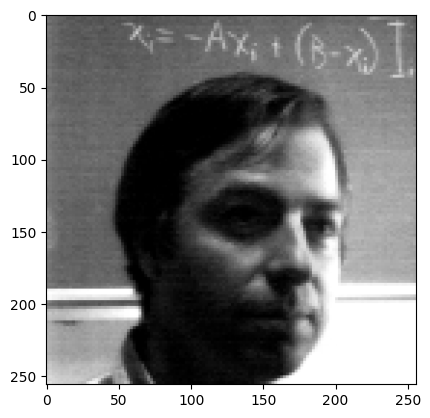

In [35]:
Dimension = 2
PixelType = itk.F                                  
RealImageType = itk.Image[PixelType, Dimension]     
IntPixelType = itk.US                         
IntImageType = itk.Image[IntPixelType, Dimension] 
ComplexImageType = itk.Image[itk.complex[PixelType], Dimension]

ReaderType = itk.ImageFileReader[RealImageType]
reader = ReaderType.New()
reader.SetFileName( inputFileName )
reader.Update()

plot_image(reader)

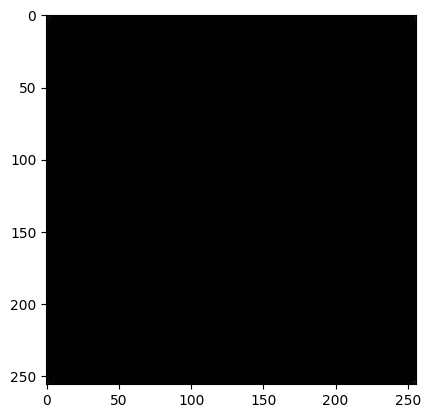

In [36]:
ForwardFFTFilterType = itk.ForwardFFTImageFilter[RealImageType, ComplexImageType]
forwardFFTFilter = ForwardFFTFilterType.New()
forwardFFTFilter.SetInput( reader.GetOutput() )
forwardFFTFilter.Update()
  
ComplexToModulusFilterType = itk.ComplexToModulusImageFilter[ComplexImageType, RealImageType]
complexToModulusFilter = ComplexToModulusFilterType.New()
complexToModulusFilter.SetInput( forwardFFTFilter.GetOutput() )
complexToModulusFilter.Update()

plot_image(complexToModulusFilter)

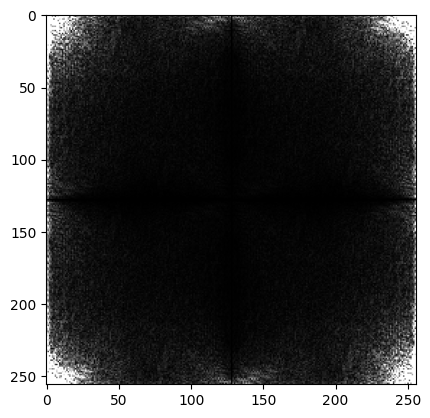

In [37]:
WindowingFilterType = itk.IntensityWindowingImageFilter[RealImageType, IntImageType]
windowingFilter = WindowingFilterType.New()
windowingFilter.SetInput( complexToModulusFilter.GetOutput() )
windowingFilter.SetWindowMinimum( 0 )
windowingFilter.SetWindowMaximum( 20000 )
windowingFilter.Update()

plot_image(windowingFilter)

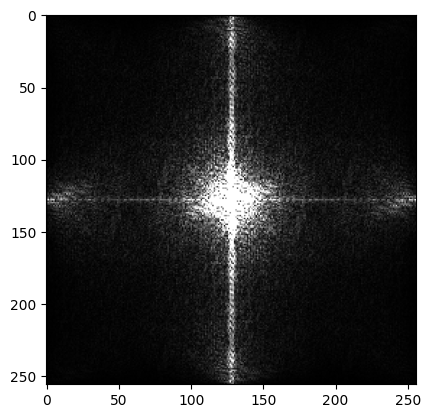

In [38]:
FFTShiftFilterType = itk.FFTShiftImageFilter[IntImageType, IntImageType]
fftShiftFilter = FFTShiftFilterType.New()
fftShiftFilter.SetInput( windowingFilter.GetOutput() )
fftShiftFilter.Update()
  
plot_image(fftShiftFilter)

In [39]:
WriterType = itk.ImageFileWriter[IntImageType]
writer = WriterType.New()
writer.SetFileName( outputFileName )
writer.SetInput( fftShiftFilter.GetOutput() )
writer.Update()
